### CONVOLUÇÃO

**Definição Matemática**  
A convolução é uma operação entre duas funções (ou sequências) que produz uma terceira função, combinando as duas originais de forma a capturar o quanto uma delas se sobrepõe à outra à medida que uma é deslocada sobre a outra.

- **Forma contínua:** Dadas duas funções contínuas \( f(t) \) e \( g(t) \), a convolução é definida por:

  $$
  (f * g)(t) = \int_{-\infty}^{\infty} f(\tau) \, g(t - \tau) \, d\tau.
  $$

- **Forma discreta:** Para sequências \( x[n] \) e \( h[n] \):

  $$
  (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n - k].
  $$

**Interpretação Prática**  
A convolução pode ser interpretada como uma forma de “filtragem” ou “passagem” de um sinal por outro. Alguns exemplos:

- **Processamento de Sinais e Sistemas LIT:**  
  A saída \( y(t) \) de um sistema Linear e Invariante no Tempo (LIT) à entrada \( x(t) \) é dada pela convolução entre a entrada e a resposta ao impulso \( h(t) \) do sistema:
  
  $$
  y(t) = (x * h)(t).
  $$

- **Processamento de Imagens:**  
  Ao aplicar filtros em imagens, a convolução com um “kernel” determina a intensidade de cada pixel na nova imagem de acordo com seus vizinhos.

- **Estatística e Probabilidade:**  
  A convolução de duas distribuições de probabilidade resulta na distribuição da soma de variáveis aleatórias independentes, mostrando como as distribuições se combinam.

Em suma, a convolução é a integração (ou soma, no caso discreto) ponderada de uma função deslocada pela outra, sendo uma ferramenta essencial para análise, modelagem e processamento de sinais e sistemas.


In [1]:
import numpy as np

In [9]:
import numpy as np
from scipy import signal

# Definindo dois arrays simples
x = np.array([1, 2, 3])
h = np.array([1, 0, 1])

# Realizando a convolução de x com h
y = np.convolve(x, h, mode='full')

print("x:", x)
print("h:", h)
print("Convolução (x * h):", y)

x: [1 2 3]
h: [1 0 1]
Convolução (x * h): [1 2 4 2 3]


In [3]:
np.convolve([1,2,3], [4,5,6], mode='full')

array([ 4, 13, 28, 27, 18])

**Relação entre Impulse Response e Convolução**  

A **resposta ao impulso (impulse response)**, denotada frequentemente por \( h(t) \) para sistemas contínuos e \( h[n] \) para sistemas discretos, é a saída de um sistema Linear e Invariante no Tempo (LTI) quando a entrada é um impulso — um sinal altamente localizado no tempo (como o delta de Dirac no contínuo e o delta de Kronecker no discreto).

A importância dessa resposta ao impulso é que ela contém todas as informações sobre o comportamento do sistema. Quando conhecemos \( h(t) \) ou \( h[n] \), podemos determinar a saída do sistema para qualquer entrada \( x(t) \) ou \( x[n] \) utilizando a operação de convolução:

- **No caso contínuo:**
  
  $$
  y(t) = (x * h)(t) = \int_{-\infty}^{\infty} x(\tau) \, h(t - \tau) \, d\tau
  $$

- **No caso discreto:**
  
  $$
  y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n - k]
  $$

Dessa forma, a resposta ao impulso age como a "assinatura" do sistema. A saída para uma entrada arbitrária é obtida convolvendo-se a entrada com essa assinatura. Em suma, a convolução entre a entrada e a resposta ao impulso fornece a saída do sistema LTI.


In [4]:
import mysignals as sigs
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style

IR = sigs.Impulse_response
sig = sigs.InputSignal_1kHz_15kHz

In [5]:
def convolution(sig_src_arr,imp_response_arr,sig_dest_arr):
    for x in range(len(sig_src_arr)+len(imp_response_arr)):
        sig_dest_arr[x] =0

    for x in range(len(sig_src_arr)):
        for y in range(len(imp_response_arr)):
            sig_dest_arr[x+y] = sig_dest_arr[x+y]+sig_src_arr[x]*imp_response_arr[y]



    style.use('ggplot')
    style.use('dark_background')

    f,plt_arr =plt.subplots(3,sharex=True)
    f.suptitle("Convolution")
    
    plt_arr[0].plot(sig_src_arr)
    plt_arr[0].set_title("Input Signal")
    
    plt_arr[1].plot(imp_response_arr, color = 'brown')
    plt_arr[1].set_title("Impulse Response", color ='brown')
    
    plt_arr[2].plot(sig_dest_arr, color ='green')
    plt_arr[2].set_title("Output Signal", color='green')

    plt.show()

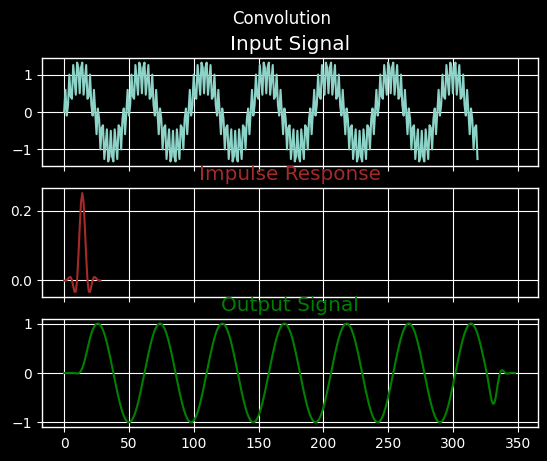

In [7]:
output_signal = [None]*349
convolution(sigs.InputSignal_1kHz_15kHz,sigs.Impulse_response,output_signal)

In [10]:
sig = np.array([0,0,0,0,0,1,1,1,1,1])
filt = np.array([1,1,0])
conv = signal.convolve(sig, filt)

### CORRELAÇÃO CRUZADA

In [13]:
corr = signal.correlate(sigs.InputSignal_1kHz_15kHz,sigs.Impulse_response, mode="same")
conv = signal.convolve(sigs.InputSignal_1kHz_15kHz,sigs.Impulse_response, mode="same")

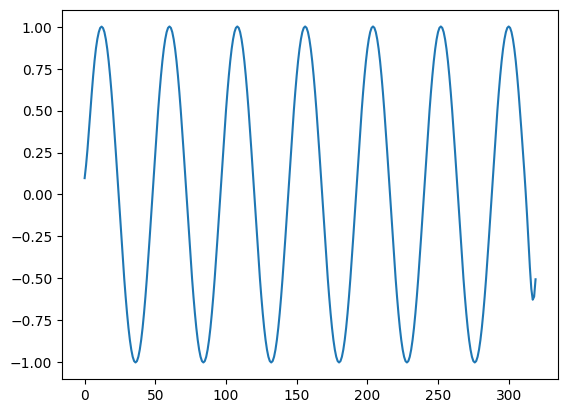

In [15]:
plt.plot(corr)
plt.show()

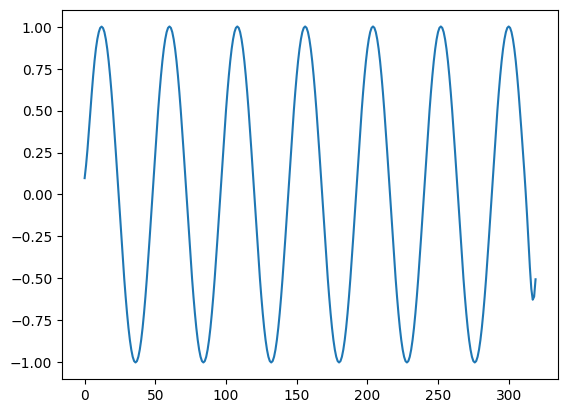

In [16]:
plt.plot(conv)
plt.show()